In [28]:
import mne
import matplotlib.pyplot as plt
import PyQt5
import numpy as np
import seaborn as sns
%matplotlib qt 

In [31]:
subject = 'WSAS20'
state = 'Base'

In [34]:
data_old = mne.io.read_raw_eeglab(f'DATA/data_original/{subject}_{state}_5min.set')

Reading /Users/charlotte/Documents/GitHub/ARI/Python_ARI/DATA/data_original/WSAS20_Base_5min.fdt


/var/folders/jt/1njpx4d93pn5y3nd0p7l5hwr0000gn/T/ipykernel_81878/3560882419.py:1: RuntimeWarning: Data file name in EEG.data (WSAS20_Baseline_Rest_CLEAN_5min.fdt) is incorrect, the file name must have changed on disk, using the correct file name (WSAS20_Base_5min.fdt).
  data_old = mne.io.read_raw_eeglab(f'DATA/data_original/{subject}_{state}_5min.set')


In [35]:
data_new = mne.read_epochs(f'DATA/continuous_derivative_WSAS/sub-{subject}/eeg/sub-{subject}_task-{state}_epoch_eeg.fif')




Reading /Users/charlotte/Documents/GitHub/ARI/Python_ARI/DATA/continuous_derivative_WSAS/sub-WSAS20/eeg/sub-WSAS20_task-Base_epoch_eeg.fif ...
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


/var/folders/jt/1njpx4d93pn5y3nd0p7l5hwr0000gn/T/ipykernel_81878/1522695073.py:1: RuntimeWarning: This filename (DATA/continuous_derivative_WSAS/sub-WSAS20/eeg/sub-WSAS20_task-Base_epoch_eeg.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  data_new = mne.read_epochs(f'DATA/continuous_derivative_WSAS/sub-{subject}/eeg/sub-{subject}_task-{state}_epoch_eeg.fif')


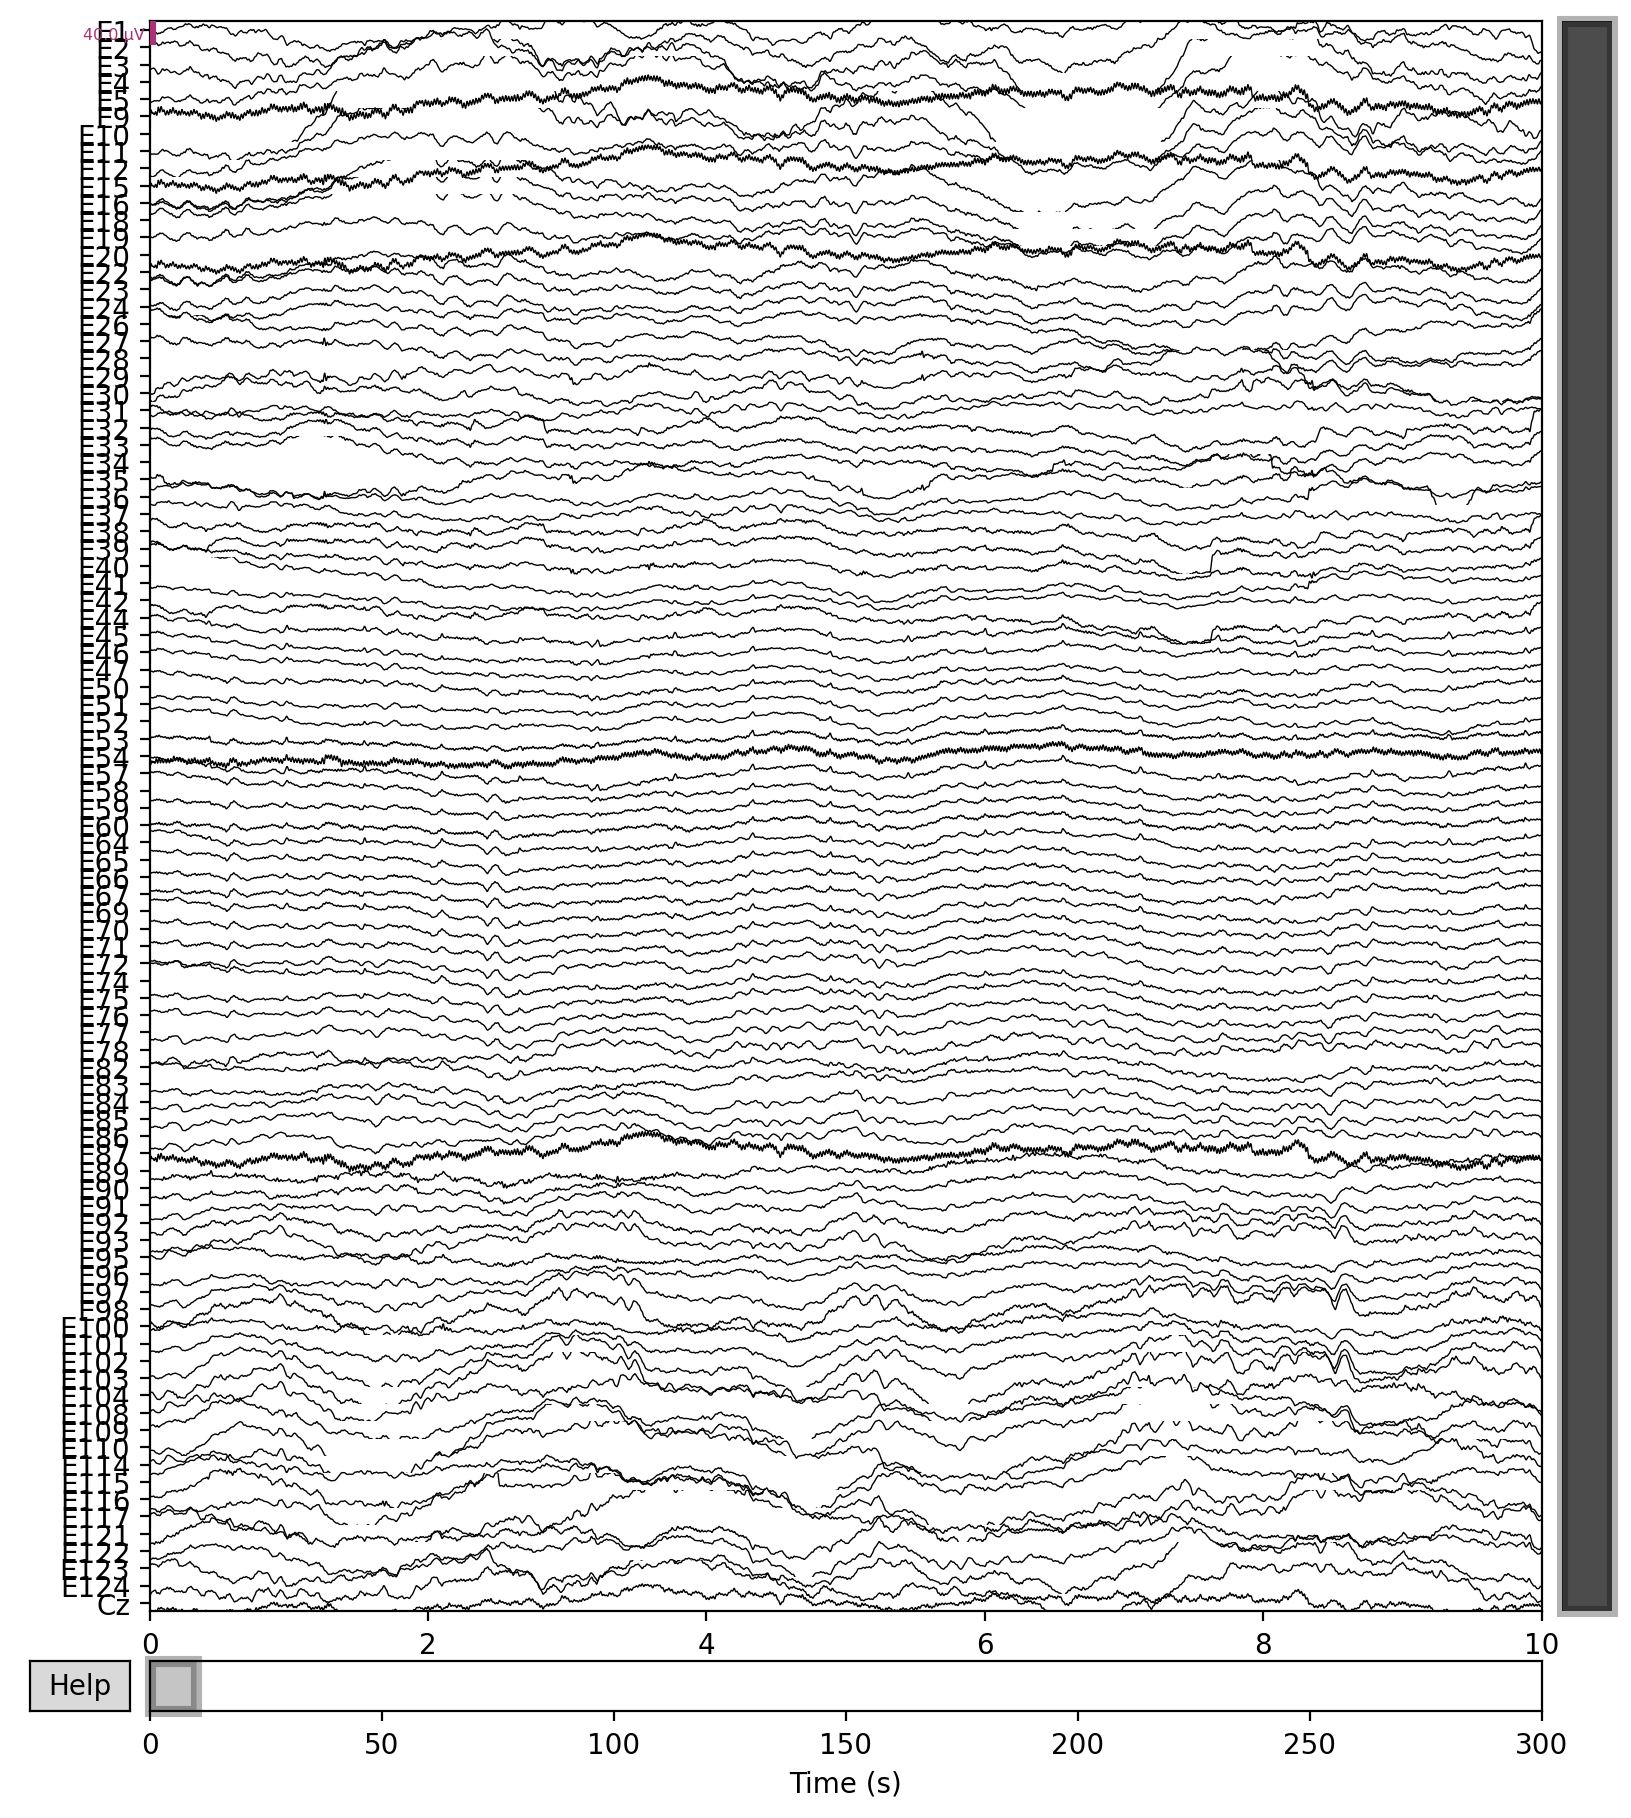

In [36]:
data_old.plot(n_channels=130)

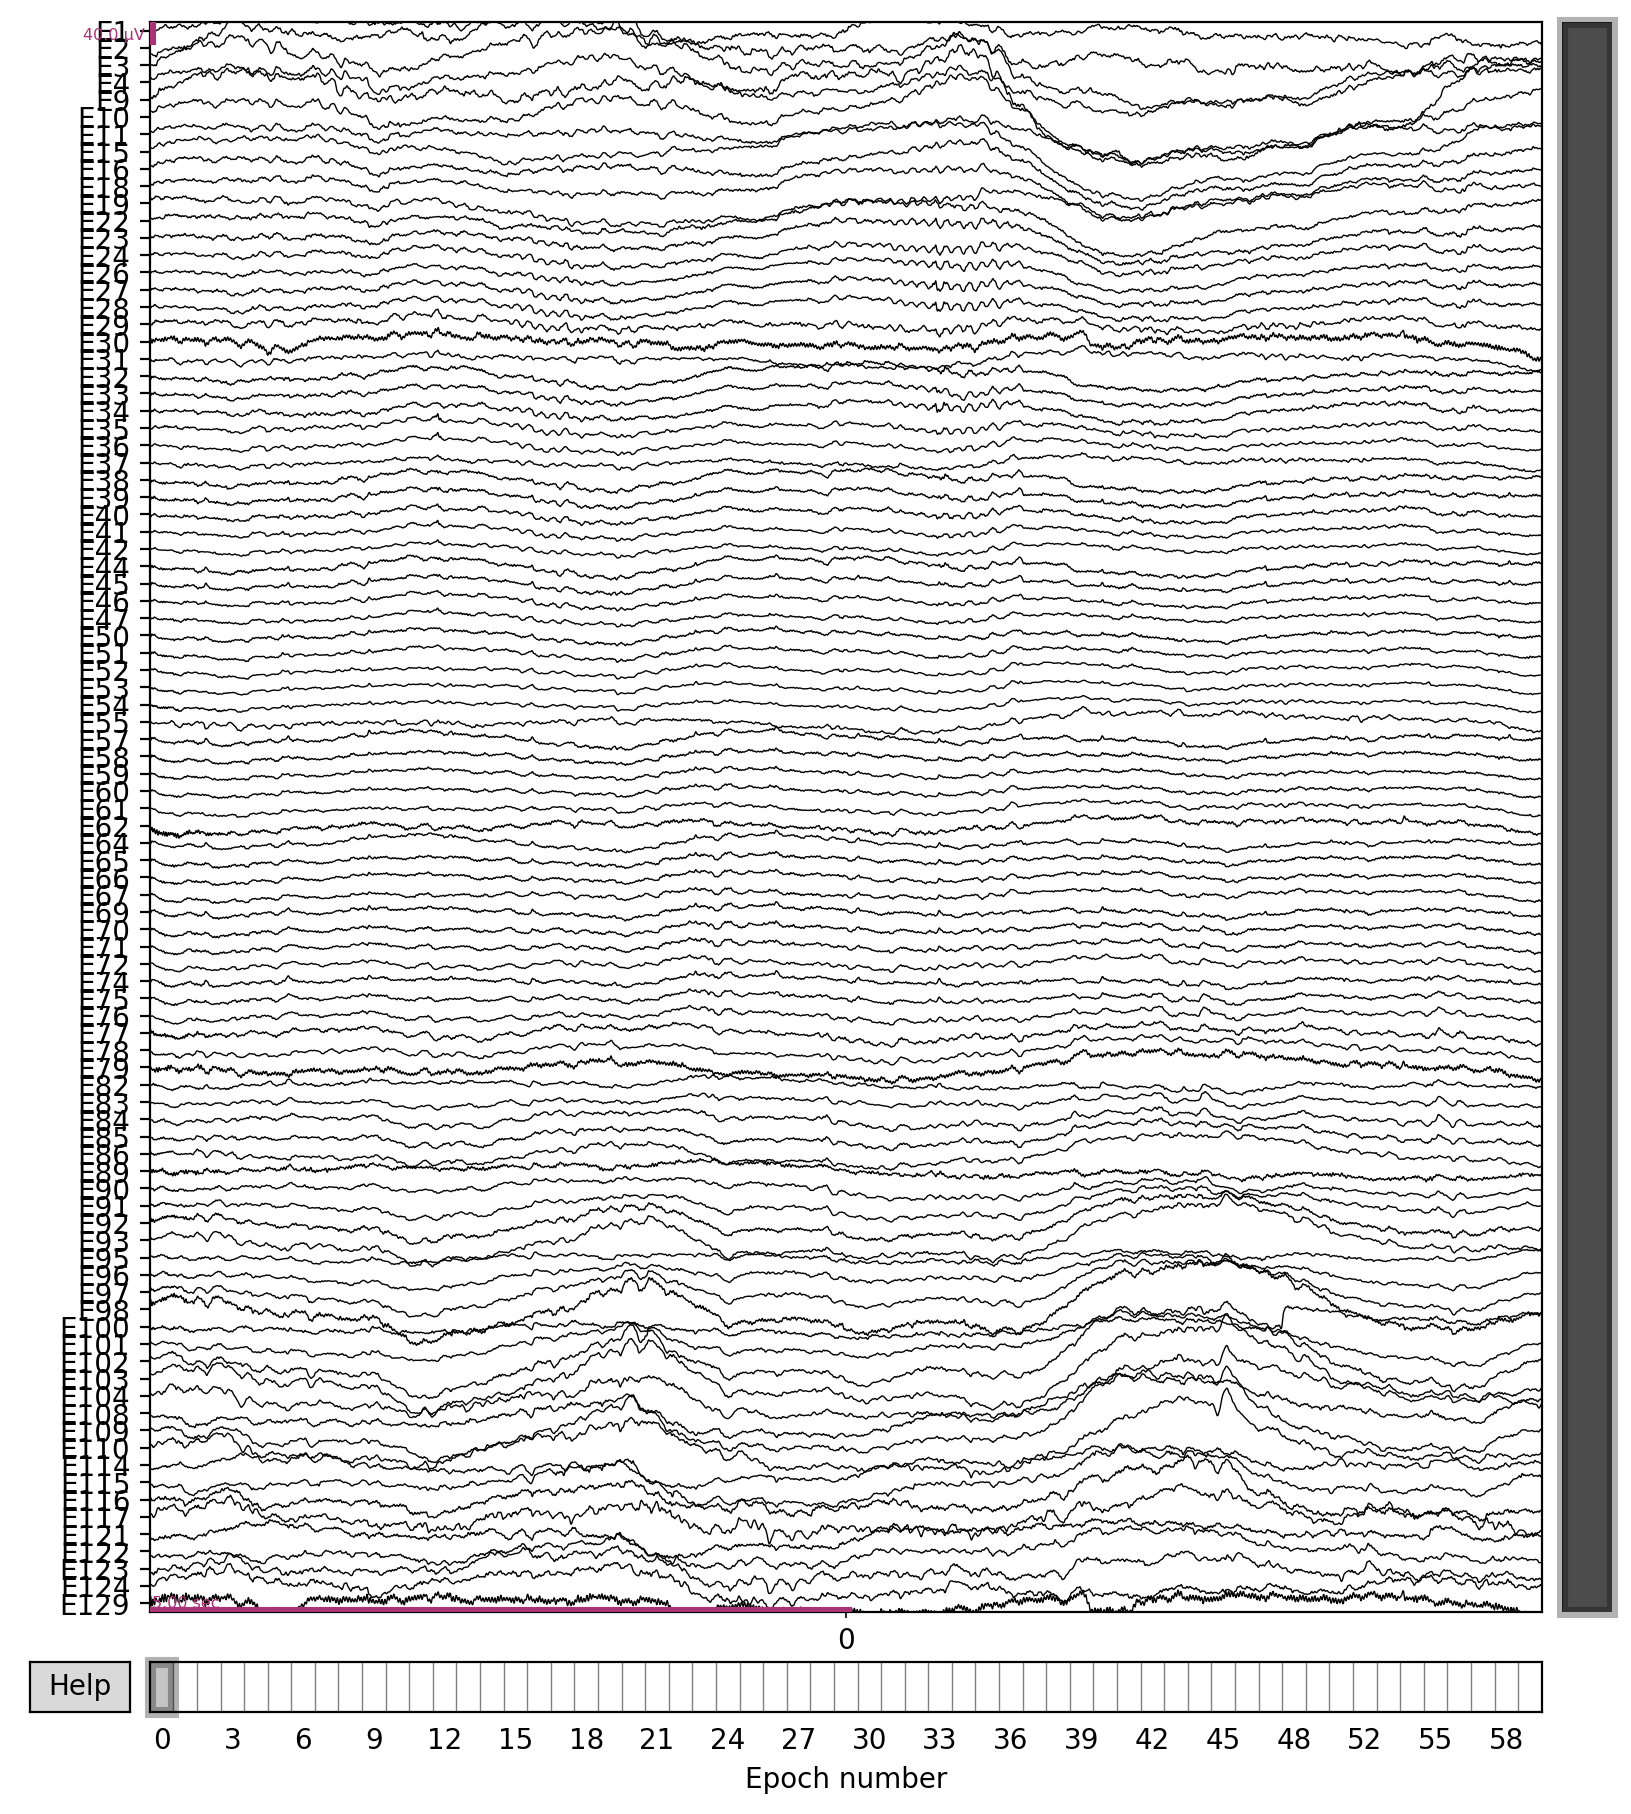

Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [37]:
data_new.plot(n_channels=130,n_epochs=1)

In [19]:
wpli_Base_old = np.load(f"RESULTS/WSAS/wPLI_alpha/wPLI_alpha_WSAS09_Anes.npy")
wpli_Base_new = np.load(f"RESULTS/WSAS_new/wPLI_alpha/wPLI_alpha_WSAS09_Anes.npy")

In [20]:
# plot time-averaged FC
fig, axs = plt.subplots(1, 2, figsize=(20,10))
sns.heatmap(wpli_Base_old.mean(0), cmap='jet', ax=axs[0], vmin=0, vmax=0.2)
sns.heatmap(wpli_Base_new.mean(0), cmap='jet', ax=axs[1], vmin=0, vmax=0.2)
plt.show()

In [21]:
dpli_Base_old = np.load(f"RESULTS/WSAS/dPLI_alpha/dPLI_alpha_WSAS09_Anes.npy")
dpli_Base_new = np.load(f"RESULTS/WSAS_new/dPLI_alpha/dPLI_alpha_WSAS09_Anes.npy")

In [23]:
# plot time-averaged FC
fig, axs = plt.subplots(1, 2, figsize=(20,10))
sns.heatmap(dpli_Base_old.mean(0), cmap='jet', ax=axs[0], vmin=0.4, vmax=0.6)
sns.heatmap(dpli_Base_new.mean(0), cmap='jet', ax=axs[1], vmin=0.4, vmax=0.6)
plt.show()

In [34]:
np.max(dpli_Base_old)

0.8622000000000001

In [35]:
np.max(dpli_Base_new)

0.845

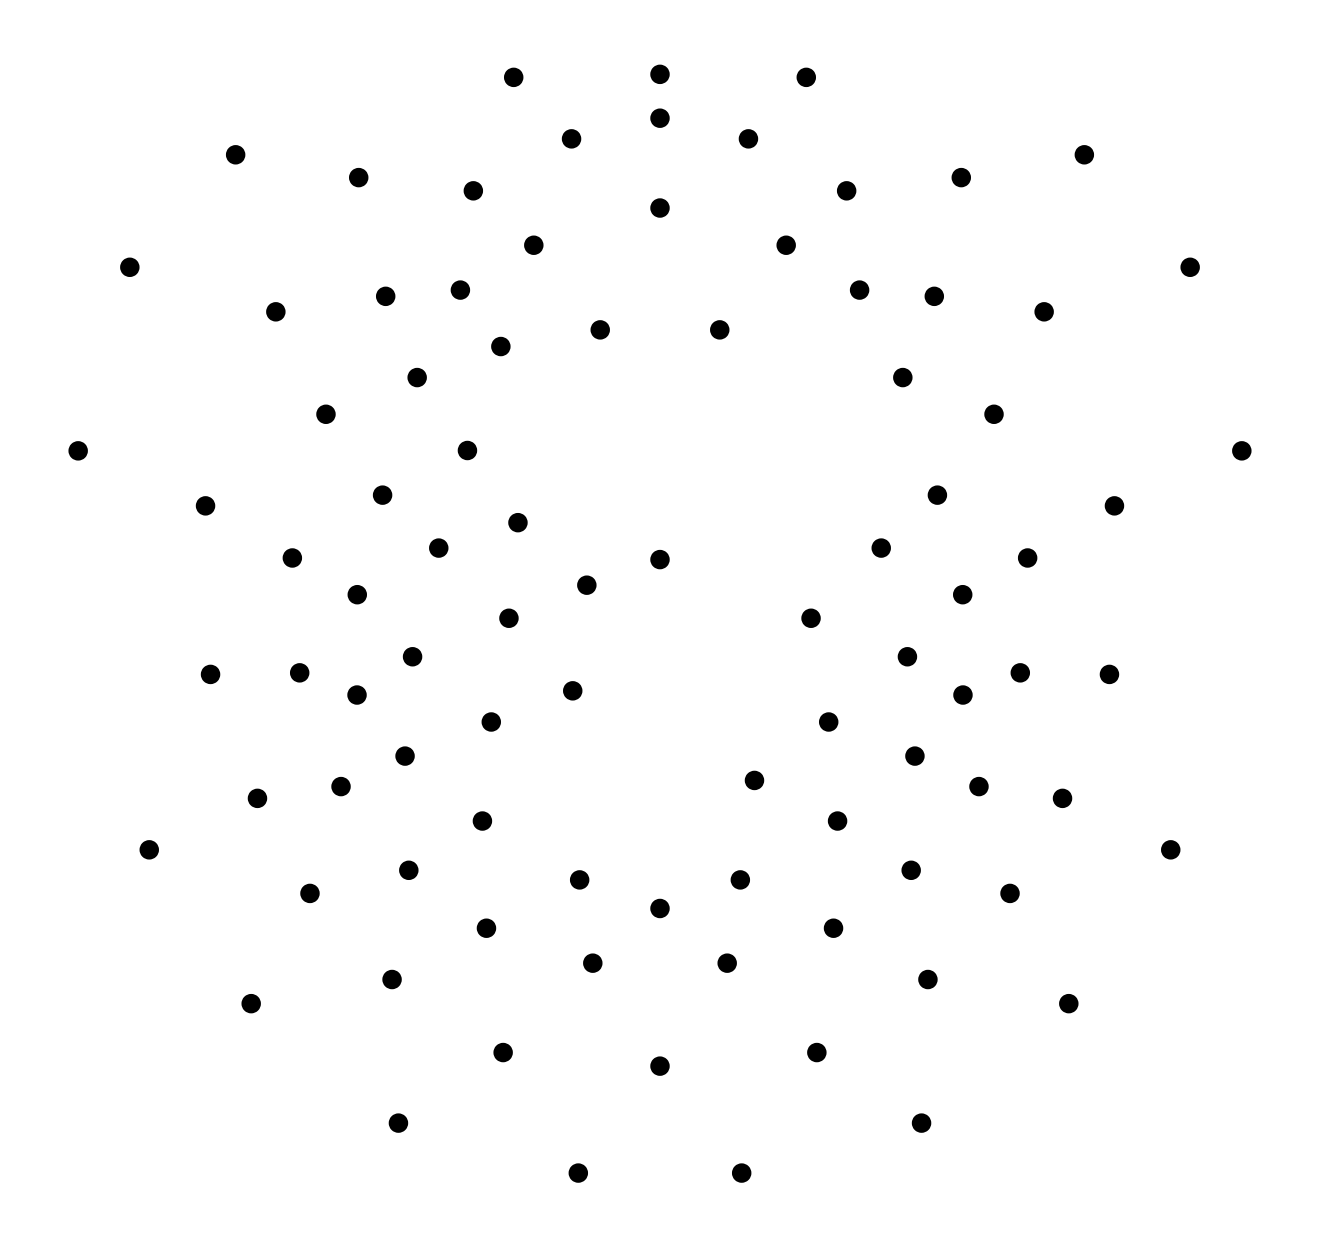

In [40]:
mne.viz.plot_sensors(data_old.info)

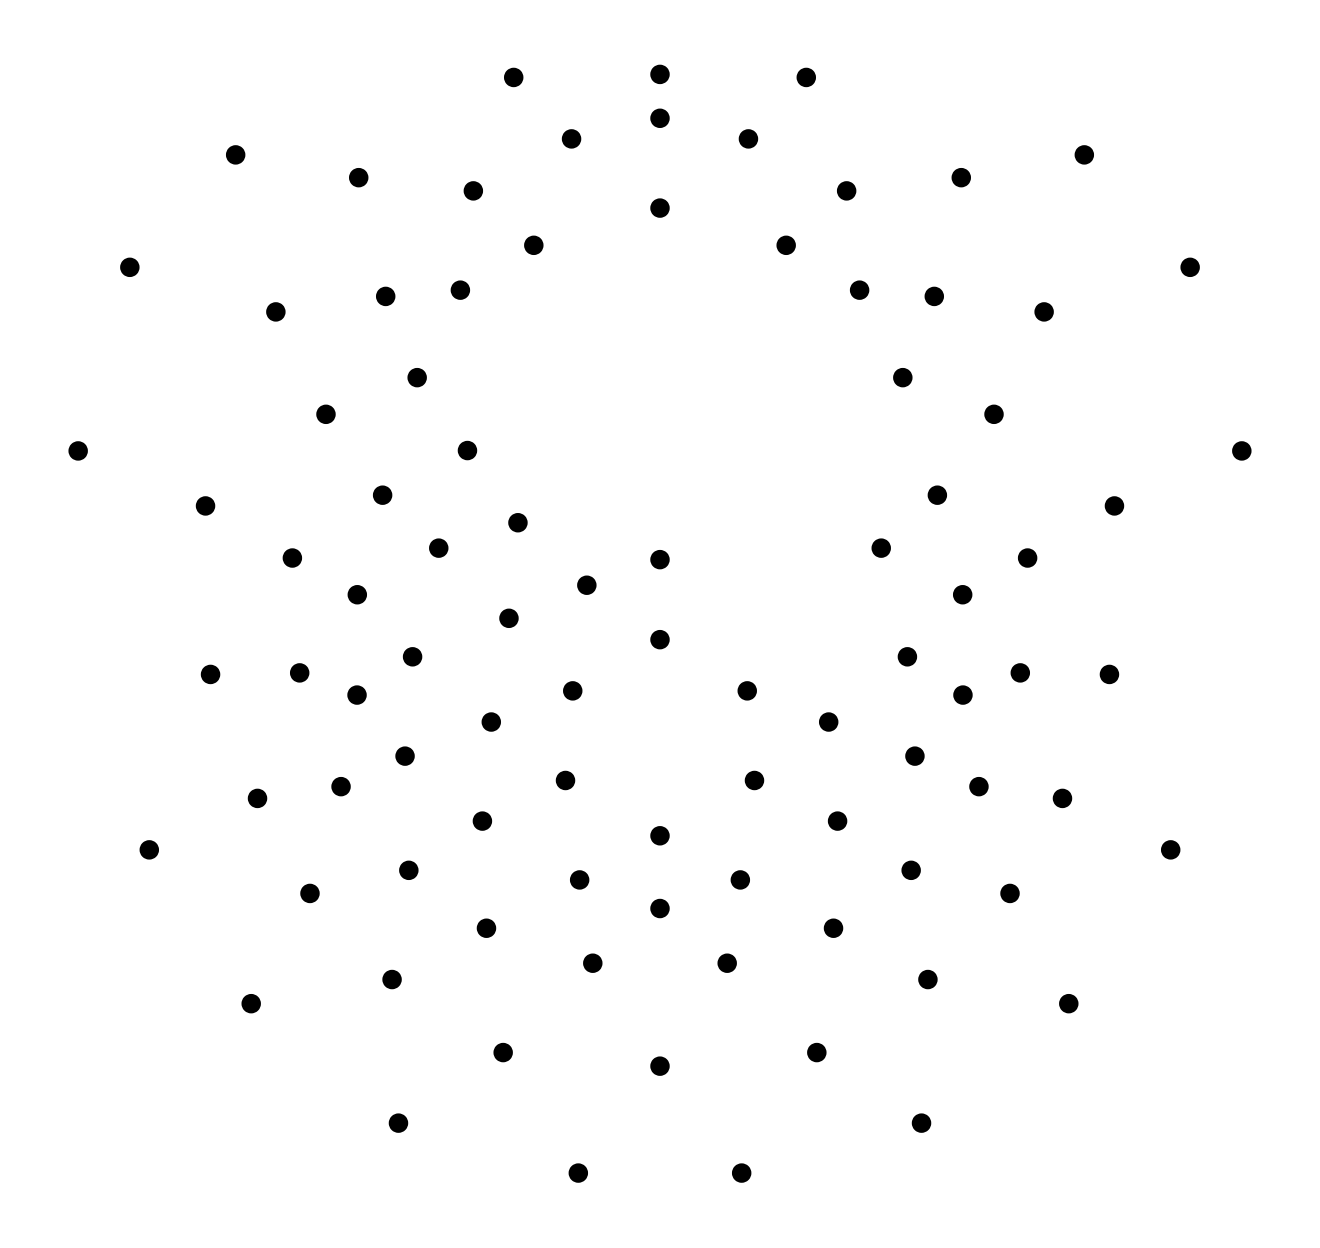

In [41]:
mne.viz.plot_sensors(data_new.info)